# Project: Wrangling and Analyze Data

In [70]:
# Import the required packages
import pandas as pd
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Load the twitter-archive-enhanced.csv file as a pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Programmatically download image prediction file amd load as a dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
        file.write(response.content)
        
img_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
img_predict.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
## Unable to get Twitter developer account

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [6]:
#access the tweet_json.txt file and load needed data as dataframe
tweets_json = []
with open('tweet_json.txt') as file:
    for line in file:
        tweets_json.append(json.loads(line))
        
        
data_counts = []
for tweet in tweets_json:
    tweet_id = tweet['id']
    favorite_counts = tweet['favorite_count']
    retweet_counts = tweet['retweet_count']
    data_counts.append({'tweet_id': tweet_id,
                        'favorite_counts': favorite_counts,
                       'retweet_counts': retweet_counts})      

In [7]:
#change the data_counts dictionary into a dataframe
data_counts = pd.DataFrame(data_counts, columns=['tweet_id','favorite_counts','retweet_counts'])

In [8]:
data_counts.head(3)

,tweet_id,favorite_counts,retweet_counts
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [89]:
#expand number of rows to be viewed
pd.set_option('display.max_rows', None)

In [ ]:
twitter_archive

In [9]:
# Programatically access data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
data_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorite_counts  2354 non-null   int64
 2   retweet_counts   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
twitter_archive.duplicated().sum()

0

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
img_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
data_counts.describe()

,tweet_id,favorite_counts,retweet_counts
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality issues
1. Twitter_archive includes irrelevant retweet columns and rows.

2. NaN values present in retweeted_status_timestamps, expanded_urls, retweeted_status_user_id columns.

3. NaN values present in retweeted_status_id, status_id, in_reply_to_status_id, in_reply_to_user_id.

4. Some Dog rating numerator value incorrect.

5. Some Dog rating denomenator value incorrect.

6. Incorrect Timestamp datatype.
.
7. Invalid Dog names in name column.

8. Twitter_archive name column with inappropirate name.

9. Irrelevant columns present in img predictions data frame.

### Tidiness issues
1. Image predictions not included for all tweets in the twitter_archive dataset.

2. Image predictions not included for all tweets in data_counts dataframe.

3. The dog stages are in multiple columns.

4. All related datasets split to three different data sets.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
img_predict_clean = img_predict.copy()
data_counts_clean = data_counts.copy()

## Quality Issues

### Issue #1: Twitter_archive includes irrelevant retweet columns and rows.

#### Define: Drop all irrelevant columns and rows.

#### Code

In [19]:
# Drop the rewtweeted rows first  as to succcefully drop irrelevant columns
retweet_rows = twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]

In [20]:
retweet_rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [21]:
#drop selected rows
twitter_archive_clean.drop(retweet_rows.index,inplace=True)

In [22]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [23]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace=True)

#### Test

In [24]:
#Confirm retweet columns have been dropped
twitter_archive_clean.sample(7)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1186,718540630683709445,2016-04-08 20:46:50 +0000,Get you a pup that can do both. 10/10 https://...,10,10,None,None,None,None,None
945,752660715232722944,2016-07-12 00:27:52 +0000,Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,10,10,None,doggo,None,None,None
854,765222098633691136,2016-08-15 16:22:20 +0000,This is Gromit. He's pupset because there's no...,10,10,Gromit,None,None,None,None
442,819588359383371776,2017-01-12 16:54:26 +0000,This is Jazzy. She just found out that sandwic...,13,10,Jazzy,None,None,None,None
1723,680100725817409536,2015-12-24 19:00:23 +0000,This pupper is not coming inside until she cat...,11,10,None,None,None,pupper,None
1020,746757706116112384,2016-06-25 17:31:25 +0000,This is Maddie. She gets some wicked air time....,11,10,Maddie,None,None,None,None
1950,673688752737402881,2015-12-07 02:21:29 +0000,Meet Larry. He doesn't know how to shoe. 9/10 ...,9,10,Larry,None,None,None,None


### Issue #2: NaN values present in retweeted_status_timestamps, expanded_urls, retweeted_status_user_id columns.

#### Define: Drop the columns with NaN values, they will be irrelevant to the analysis

#### Code

In [25]:
# Quality issue fixed in #Issue 1

#### Test

In [26]:
# Tested in issue 1

### Issue #3: NaN values present in retweeted_status_id, status_id, in_reply_to_status_id, in_reply_to_user_id.

#### Code

In [27]:
# Quality issue fixed in #Issue 1

#### Test

In [27]:
# Tested in issue 1

### Issue #4: Some Dog rating numerator value incorrect.

#### Code

In [28]:
# Replace the current columns with original value got from the text column using a for loop
denominator =[]
numerator = []
for sentence in twitter_archive_clean['text'].tolist():
    reg_pattern = '\d\d/\d\d'
    outcome = re.findall(reg_pattern,sentence)
    if len(outcome) >= 1:
        split_outcome = outcome[0].split('/')
        numerator.append(split_outcome[0])
        denominator.append(split_outcome[1])
    else:
        numerator.append('-')
        denominator.append('-')

In [29]:
#Remove the initial numerator and denominator from the twitter_archive column
twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

In [30]:
#create another column for the numerator and denominator got from the text column
twitter_archive_clean['rate_numerator'] = numerator
twitter_archive_clean['rate_denominator'] = denominator

#### Test

In [31]:
twitter_archive_clean.head(30)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rate_numerator,rate_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12,10
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,None,None,None,None,None,13,10
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,Jax,None,None,None,None,13,10
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,None,None,None,None,None,13,10
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,Zoey,None,None,None,None,13,10
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,Cassie,doggo,None,None,None,14,10


### Issue #5: Some Dog rating denomenator value incorrect.

#### Code

In [32]:
# Quality issue fixed in #Issue 4

#### Test

In [33]:
# Tested in issue 1

### Issue #6: Incorrect Timestamp datatype.

#### Code

In [34]:
# Change the datatype to time date
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   name              2175 non-null   object             
 4   doggo             2175 non-null   object             
 5   floofer           2175 non-null   object             
 6   pupper            2175 non-null   object             
 7   puppo             2175 non-null   object             
 8   rate_numerator    2175 non-null   object             
 9   rate_denominator  2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 186.9+ KB


### Issue #7: Invalid Dog names in name column.

#### Code

#### Resource : https://towardsdatascience.com/an-easy-way-to-replace-values-in-a-pandas-dataframe-2826bd34e59a

In [36]:
#expand number of rows to be viewed
pd.set_option('display.max_rows', 1500)

In [37]:
#check for invalid names
twitter_archive_clean['name'].value_counts()

None              680
a                  55
Lucy               11
Charlie            11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Lola                8
the                 8
Winston             8
Sadie               8
Daisy               7
Toby                7
Stanley             6
Jax                 6
Bella               6
an                  6
Bo                  6
Bailey              6
Koda                6
Oscar               6
Rusty               5
Milo                5
Scout               5
Louis               5
Dave                5
Chester             5
Bentley             5
Leo                 5
Buddy               5
Clark               4
Reggie              4
Sammy               4
Larry               4
Maggie              4
Clarence            4
Oakley              4
Winnie              4
Scooter             4
Duke                4
Sophie              4
Jerry               4
Jack                4
Jeffrey             4
Cassie    

In [38]:
invalid_names_dict = {
    'my':'None','his':'None','old':'None','all':'None',
    'mad':'None','this':'None','a':'None','by':'None',
    'just':'None','one':'None','quite':'None','an':'None',
    'the':'None','O':'None'
}
twitter_archive_clean['name'] =twitter_archive_clean['name'].replace(invalid_names_dict)

#### Test

In [39]:
twitter_archive_clean['name'].value_counts()

None              767
Charlie            11
Lucy               11
Cooper             10
Oliver             10
Penny               9
Tucker              9
Lola                8
Sadie               8
Winston             8
Daisy               7
Toby                7
Koda                6
Jax                 6
Bo                  6
Stanley             6
Bella               6
Oscar               6
Bailey              6
Dave                5
Bentley             5
Buddy               5
Louis               5
Milo                5
Rusty               5
Chester             5
Scout               5
Leo                 5
very                4
Phil                4
George              4
Bear                4
Larry               4
Brody               4
Sammy               4
Clarence            4
Winnie              4
Cassie              4
Clark               4
Jerry               4
Archie              4
Duke                4
Boomer              4
Jack                4
Finn                4
Gus       

### Issue #8: Twitter_archive name column with inappropirate name.

#### Code

In [41]:
twitter_archive_clean.rename(columns = {'name': 'dog_name'},inplace=True)

#### Test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   dog_name          2175 non-null   object             
 4   doggo             2175 non-null   object             
 5   floofer           2175 non-null   object             
 6   pupper            2175 non-null   object             
 7   puppo             2175 non-null   object             
 8   rate_numerator    2175 non-null   object             
 9   rate_denominator  2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 186.9+ KB


### Issue #9: Irrelevant columns present in img predictions data frame.

#### Code

In [43]:
img_predict_clean.drop(['p1_conf','p2_conf','p3_conf'],axis=1,inplace=True)

#### Test

In [44]:
img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   p1        2075 non-null   object
 4   p1_dog    2075 non-null   bool  
 5   p2        2075 non-null   object
 6   p2_dog    2075 non-null   bool  
 7   p3        2075 non-null   object
 8   p3_dog    2075 non-null   bool  
dtypes: bool(3), int64(2), object(4)
memory usage: 103.5+ KB


## Tidiness Issues 

### Issue #1: Image predictions not included for all tweets in the twitter_archive dataset.

#### Define: Remove tweet observation units that do not have image predictions from the twitter archive data frame.

#### Code

In [45]:
# Remove tweet rows using a for loop
num = 0
for tweet in twitter_archive_clean['tweet_id'].tolist():
    if tweet not in img_predict_clean['tweet_id'].tolist():
        if num == 0:
            no_img = twitter_archive_clean[twitter_archive_clean['tweet_id'] == tweet]
            num+=1
        else:
            no_img1 = twitter_archive_clean[twitter_archive_clean['tweet_id'] == tweet]
            no_img = no_img.append(no_img1)

In [46]:
no_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 30 to 2298
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          181 non-null    int64              
 1   timestamp         181 non-null    datetime64[ns, UTC]
 2   text              181 non-null    object             
 3   dog_name          181 non-null    object             
 4   doggo             181 non-null    object             
 5   floofer           181 non-null    object             
 6   pupper            181 non-null    object             
 7   puppo             181 non-null    object             
 8   rate_numerator    181 non-null    object             
 9   rate_denominator  181 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 15.6+ KB


In [47]:
# Remove the tweet rows without image prediction from the twitter archive data frame
twitter_archive_clean.drop(no_img.index,inplace=True)

#### Test

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1994 non-null   int64              
 1   timestamp         1994 non-null   datetime64[ns, UTC]
 2   text              1994 non-null   object             
 3   dog_name          1994 non-null   object             
 4   doggo             1994 non-null   object             
 5   floofer           1994 non-null   object             
 6   pupper            1994 non-null   object             
 7   puppo             1994 non-null   object             
 8   rate_numerator    1994 non-null   object             
 9   rate_denominator  1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 171.4+ KB


### Issue #2: Image predictions not included for all tweets in data_counts dataframe.

#### Define: Remove data counts tweet that are not in image prediction data frame

#### Code

In [49]:
# Remove tweet rows using a for loop
num = 0
for tweet in data_counts_clean['tweet_id'].tolist():
    if tweet not in img_predict_clean['tweet_id'].tolist():
        if num == 0:
            no_data_count = data_counts_clean[data_counts_clean['tweet_id'] == tweet]
            num+=1
        else:
            no_data_count1 = data_counts_clean[data_counts_clean['tweet_id'] == tweet]
            no_data_count = no_data_count.append(no_data_count1)

In [52]:
no_data_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 29 to 2296
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         281 non-null    int64
 1   favorite_counts  281 non-null    int64
 2   retweet_counts   281 non-null    int64
dtypes: int64(3)
memory usage: 8.8 KB


In [54]:
data_counts_clean.drop(no_data_count.index,inplace=True)

#### Test

In [55]:
data_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2073 non-null   int64
 1   favorite_counts  2073 non-null   int64
 2   retweet_counts   2073 non-null   int64
dtypes: int64(3)
memory usage: 64.8 KB


### Issue #3: The dog stages are in multiple columns.

#### Define: Combine all dog stages to one column

#### Resource : 
>https://stackoverflow.com/questions/50276129/how-to-combine-multiple-columns-in-a-pandas-dataframe-by-using-apply
>https://towardsdatascience.com/an-easy-way-to-replace-values-in-a-pandas-dataframe-2826bd34e59a

#### Code

In [56]:
# Combine the dog stage column
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)

In [57]:
twitter_archive_clean.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

In [58]:
twitter_archive_clean.dog_stage.value_counts()

None, None, None, None        1688
None, None, pupper, None       203
doggo, None, None, None         63
None, None, None, puppo         22
doggo, None, pupper, None        9
None, floofer, None, None        7
doggo, None, None, puppo         1
doggo, floofer, None, None       1
Name: dog_stage, dtype: int64

In [59]:
dog_names_dict = {
    'None, None, None, None':'None','None, None, pupper, None':'pupper',
    'doggo, None, None, None':'doggo','None, None, None, puppo':'puppo',
    'doggo, None, pupper, None':'doggo,pupper','None, floofer, None, None':'floofer',
    'doggo, None, None, puppo':'doggo,puppo','doggo, floofer, None, None':'doggo,floofer'
}
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].replace(dog_names_dict)

#### Test

In [60]:
twitter_archive_clean.dog_stage.value_counts()

None             1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Issue #4: All related datasets split to three different data sets.

#### Define: combine all 3 data sets to one dataframe

#### Resource : https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

#### Code

In [61]:
# Join all three related data sets for analysis
df = twitter_archive_clean.merge(img_predict_clean,on='tweet_id').merge(data_counts_clean,on='tweet_id')

#### Test

In [62]:
df

,tweet_id,timestamp,text,dog_name,rate_numerator,rate_denominator,dog_stage,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_counts,retweet_counts
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,13,10,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,13,10,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,12,10,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,malamute,True,kelpie,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,13,10,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,Labrador_retriever,True,spatula,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,12,10,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,English_springer,True,German_short-haired_pointer,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,None,-,-,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True,111,41
1990,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,None,-,-,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,311,147
1991,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,None,-,-,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True,128,47
1992,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,None,-,-,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,132,48


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1994 non-null   int64              
 1   timestamp         1994 non-null   datetime64[ns, UTC]
 2   text              1994 non-null   object             
 3   dog_name          1994 non-null   object             
 4   rate_numerator    1994 non-null   object             
 5   rate_denominator  1994 non-null   object             
 6   dog_stage         1994 non-null   object             
 7   jpg_url           1994 non-null   object             
 8   img_num           1994 non-null   int64              
 9   p1                1994 non-null   object             
 10  p1_dog            1994 non-null   bool               
 11  p2                1994 non-null   object             
 12  p2_dog            1994 non-null   bool               
 13  p3 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
#save new data in a master data frame
df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
# load the master data frame
df = pd.read_csv('twitter_archive_master.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1994 non-null   int64 
 1   timestamp         1994 non-null   object
 2   text              1994 non-null   object
 3   dog_name          1994 non-null   object
 4   rate_numerator    1994 non-null   object
 5   rate_denominator  1994 non-null   object
 6   dog_stage         1994 non-null   object
 7   jpg_url           1994 non-null   object
 8   img_num           1994 non-null   int64 
 9   p1                1994 non-null   object
 10  p1_dog            1994 non-null   bool  
 11  p2                1994 non-null   object
 12  p2_dog            1994 non-null   bool  
 13  p3                1994 non-null   object
 14  p3_dog            1994 non-null   bool  
 15  favorite_counts   1994 non-null   int64 
 16  retweet_counts    1994 non-null   int64 
dtypes: bool(3), in

In [71]:
df.sample(30)

,tweet_id,timestamp,text,dog_name,rate_numerator,rate_denominator,dog_stage,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_counts,retweet_counts
1244,688064179421470721,2016-01-15 18:24:18+00:00,This is Kilo. He's a Pouncing Brioche. Really ...,Kilo,11,10,None,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,True,Norwegian_elkhound,True,Siberian_husky,True,1878,408
648,760252756032651264,2016-08-01 23:15:56+00:00,This is Fido. He can tell the weather. Not goo...,Fido,-,-,None,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,False,dam,False,crane,False,4338,995
672,757354760399941633,2016-07-24 23:20:20+00:00,"This is Devón (pronounced ""Eric""). He forgot h...",Devón,-,-,None,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,True,whippet,True,ice_lolly,False,4995,1637
297,825535076884762624,2017-01-29 02:44:34+00:00,Here's a very loving and accepting puppo. Appe...,None,14,10,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,True,Tibetan_mastiff,True,black-and-tan_coonhound,True,56413,19669
917,717841801130979328,2016-04-06 22:29:56+00:00,This is Barclay. His father was a banana. 11/1...,Barclay,11,10,None,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,True,English_springer,True,bath_towel,False,2660,670
65,877736472329191424,2017-06-22 03:54:17+00:00,This is Aja. She was just told she's a good do...,Aja,13,10,None,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,Chesapeake_Bay_retriever,True,Labrador_retriever,True,Weimaraner,True,71144,17300
1043,705066031337840642,2016-03-02 16:23:36+00:00,This is Reese. He's a Chilean Sohcahtoa. Loves...,Reese,12,10,None,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale,True,Irish_terrier,True,otterhound,True,2378,683
633,762316489655476224,2016-08-07 15:56:28+00:00,This is Scout. He specializes in mid-air freez...,Scout,11,10,None,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,False,Madagascar_cat,False,television,False,5350,1298
543,779123168116150273,2016-09-23 01:00:13+00:00,This is Reggie. He hugs everyone he meets. 12/...,Reggie,12,10,None,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,True,soft-coated_wheaten_terrier,True,cocker_spaniel,True,13206,4207
54,880221127280381952,2017-06-29 00:27:25+00:00,Meet Jesse. He's a Fetty Woof. His tongue ejec...,Jesse,12,10,None,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,Chihuahua,True,meerkat,False,clumber,True,27640,4436


In [72]:
df.describe()

,tweet_id,img_num,favorite_counts,retweet_counts
count,1.994000e+03,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,1.203109,8895.725677,2766.753260
std,6.747816e+16,0.560777,12213.193181,4674.698447
min,6.660209e+17,1.000000,81.000000,16.000000
25%,6.758475e+17,1.000000,1982.000000,624.750000
50%,7.084748e+17,1.000000,4136.000000,1359.500000
75%,7.877873e+17,1.000000,11308.000000,3220.000000
max,8.924206e+17,4.000000,132810.000000,79515.000000


In [73]:
most_retweets = df[df['retweet_counts'] == 79515]

In [80]:
pd.set_option('display.max_colwidth', 900)

In [81]:
most_retweets

,tweet_id,timestamp,text,dog_name,rate_numerator,rate_denominator,dog_stage,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_counts,retweet_counts
775,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,13,10,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,True,ice_bear,False,whippet,True,131075,79515


In [82]:
most_retweets['jpg_url']

775    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

In [83]:
most_favourite_counts = df[df['favorite_counts'] == 132810]

In [84]:
most_favourite_counts

,tweet_id,timestamp,text,dog_name,rate_numerator,rate_denominator,dog_stage,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_counts,retweet_counts
309,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,13,10,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,True,Labrador_retriever,True,Irish_terrier,True,132810,48265


### Insights:
1. It seems dog rating of 12 seems to be the most common rating.

2. The Dog with the most retweets is a dog in doggo stage and has a rating of 13.
.
3. The Dog with the most favorite counts is a dog in stage puppo and has a rating of 13.

### Visualization

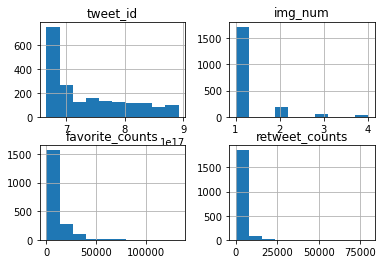

In [86]:
df.hist();

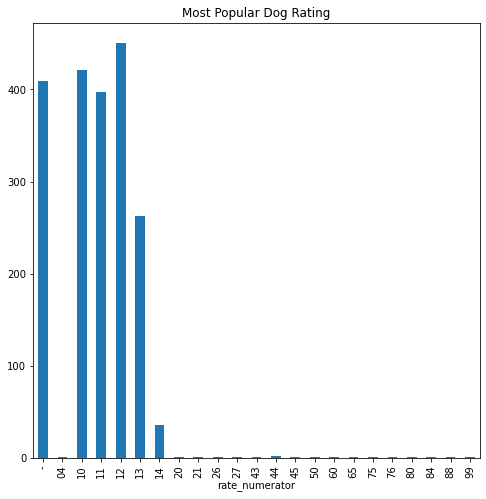

In [87]:
df.groupby('rate_numerator').count()['dog_name'].plot(kind='bar',title='Most Popular Dog Rating',figsize=(8,8));